Para este notebook utilizaremos uma outra base de dados sobre aluguel de bicicletas.

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import keras
import numpy as np

mpl.rcParams['figure.figsize'] = (12,6)

# Configurando a fonte de forma global
mpl.rcParams['font.size'] = 14

SEED = 42

### Análise exploratória

In [46]:
df = pd.read_csv('bicicletas.csv')
df.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   datas        17414 non-null  object 
 1   contagem     17414 non-null  int64  
 2   temperatura  17414 non-null  float64
 3   sensacao     17414 non-null  float64
 4   umidade      17414 non-null  float64
 5   vel_vento    17414 non-null  float64
 6   clima        17414 non-null  float64
 7   feriado      17414 non-null  float64
 8   final_ds     17414 non-null  float64
 9   estacao      17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


Precisamos converter a coluna datas de object (string) para datetime.

In [48]:
df['datas'] = pd.to_datetime(df['datas'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   datas        17414 non-null  datetime64[ns]
 1   contagem     17414 non-null  int64         
 2   temperatura  17414 non-null  float64       
 3   sensacao     17414 non-null  float64       
 4   umidade      17414 non-null  float64       
 5   vel_vento    17414 non-null  float64       
 6   clima        17414 non-null  float64       
 7   feriado      17414 non-null  float64       
 8   final_ds     17414 non-null  float64       
 9   estacao      17414 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB


<Axes: xlabel='datas', ylabel='contagem'>

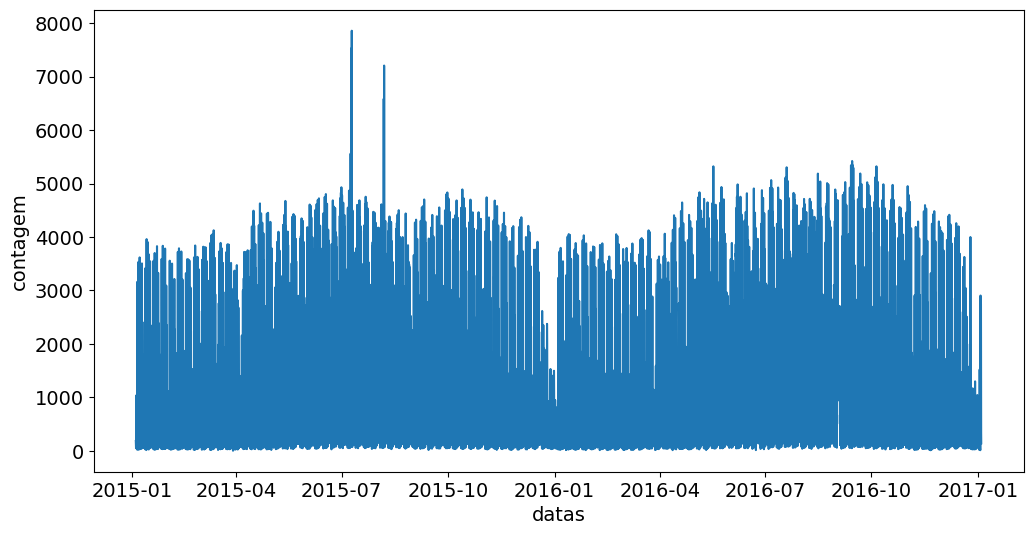

In [49]:
sns.lineplot(x='datas', y='contagem', data=df)